In [21]:
from pandas import read_csv
import prophet
from prophet import Prophet
import pandas as pd

In [27]:
file_name = '/Users/dgalembeck/Documents/Coding/Marees/Daniel/PIIA-Marees/Data/1959_1963.csv'

In [31]:
data_ = read_csv(file_name, header=0, index_col=0, parse_dates=True, squeeze=True)
data_['Date'] = data_.index

/var/folders/68/4x9n_y4x57vbdd5cvpzj5g5w0000gn/T/ipykernel_51188/49039064.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data_ = read_csv(file_name, header=0, index_col=0, parse_dates=True, squeeze=True)


,Valeur,Source,Date
Date,,,
1959-01-01 00:00:00,2.85,4,1959-01-01 00:00:00
1959-01-01 01:00:00,2.20,4,1959-01-01 01:00:00
1959-01-01 02:00:00,1.82,4,1959-01-01 02:00:00
1959-01-01 03:00:00,2.15,4,1959-01-01 03:00:00
1959-01-01 04:00:00,3.10,4,1959-01-01 04:00:00


In [38]:
data_.Date = pd.to_datetime(data_.Date)

data = data_.drop(columns=['Source', 'Date'])
data = data.reset_index()
data = data.rename(columns={'Date': 'ds', 'Valeur':'y'})


data.tail()

,ds,y
43665,1963-12-31 19:00:00,5.05
43666,1963-12-31 20:00:00,3.70
43667,1963-12-31 21:00:00,2.40
43668,1963-12-31 22:00:00,1.34
43669,1963-12-31 23:00:00,0.95


In [56]:
train = data[data.ds < pd.to_datetime('1961-06-30 23:00:00')]
test = data[data.ds > pd.to_datetime('1961-06-30 23:00:00')]

#training_data = data.iloc[X_train]
#test_data = data.iloc[X_test]

train.head(), test.tail()

(                   ds     y
 0 1959-01-01 00:00:00  2.85
 1 1959-01-01 01:00:00  2.20
 2 1959-01-01 02:00:00  1.82
 3 1959-01-01 03:00:00  2.15
 4 1959-01-01 04:00:00  3.10,
                        ds     y
 43665 1963-12-31 19:00:00  5.05
 43666 1963-12-31 20:00:00  3.70
 43667 1963-12-31 21:00:00  2.40
 43668 1963-12-31 22:00:00  1.34
 43669 1963-12-31 23:00:00  0.95)

In [59]:
m = Prophet()
m.fit(train)

future = m.make_future_dataframe(periods=int(len(test)+95), freq = 'H')
forecast = m.predict(future)

15:36:36 - cmdstanpy - INFO - Chain [1] start processing
15:36:37 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.tail()

,ds,yhat,yhat_lower,yhat_upper
43759,1963-12-31 19:00:00,4.259673,2.321357,6.125752
43760,1963-12-31 20:00:00,3.881469,1.753086,5.782049
43761,1963-12-31 21:00:00,3.516978,1.488020,5.377010
43762,1963-12-31 22:00:00,3.260003,1.306107,5.063770
43763,1963-12-31 23:00:00,3.175722,1.244257,5.134775


In [178]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, max_error

y_true = test.y
y_pred = forecast[forecast.ds.isin(test.ds)].yhat

print(f'MSE:{mean_squared_error(y_true, y_pred)} \n R^2 {r2_score(y_true, y_pred)} \n MAE: {mean_absolute_error(y_true, y_pred)} \n MAE: {median_absolute_error(y_true, y_pred)} \n Max Error: {max_error(y_true, y_pred)}')

MSE:2.4679994248761505 
 R^2 -2.0166766919071932e-05 /n MAE: 1.3770649263668049 /n MAE: 1.417682264739872 /n Max Error: 3.1994752809557236


21:46:57 - cmdstanpy - INFO - Chain [1] start processing
21:47:02 - cmdstanpy - INFO - Chain [1] done processing


2.4679994248761505 -2.0166766919071932e-05 1.3770649263668049 1.417682264739872 3.1994752809557236


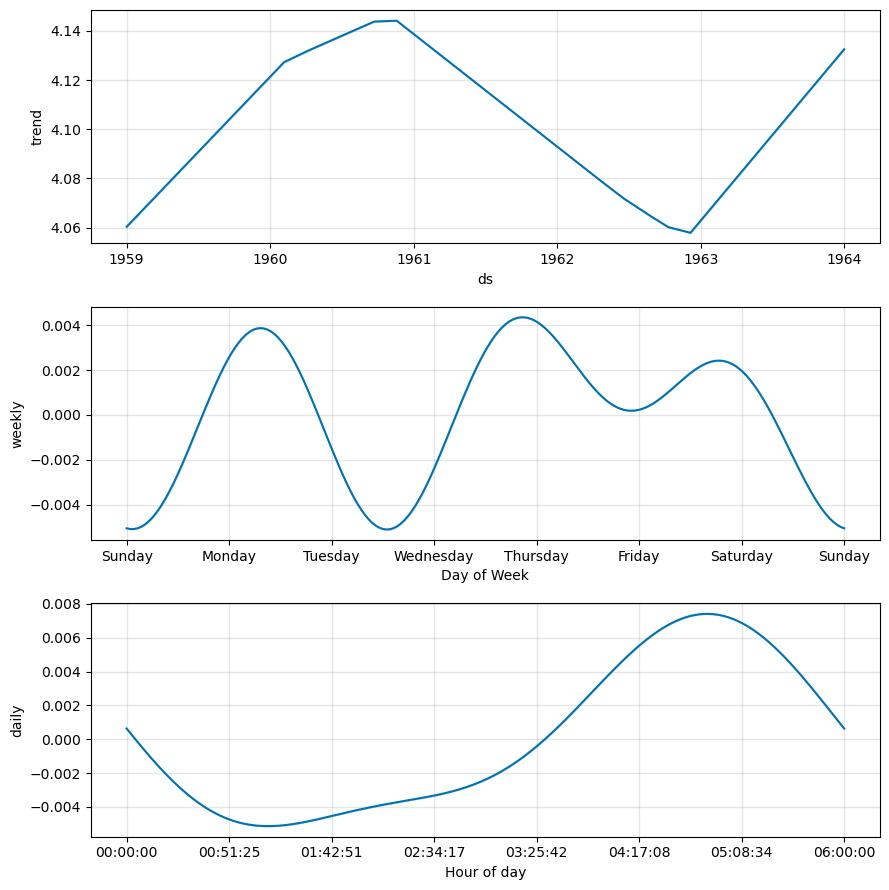

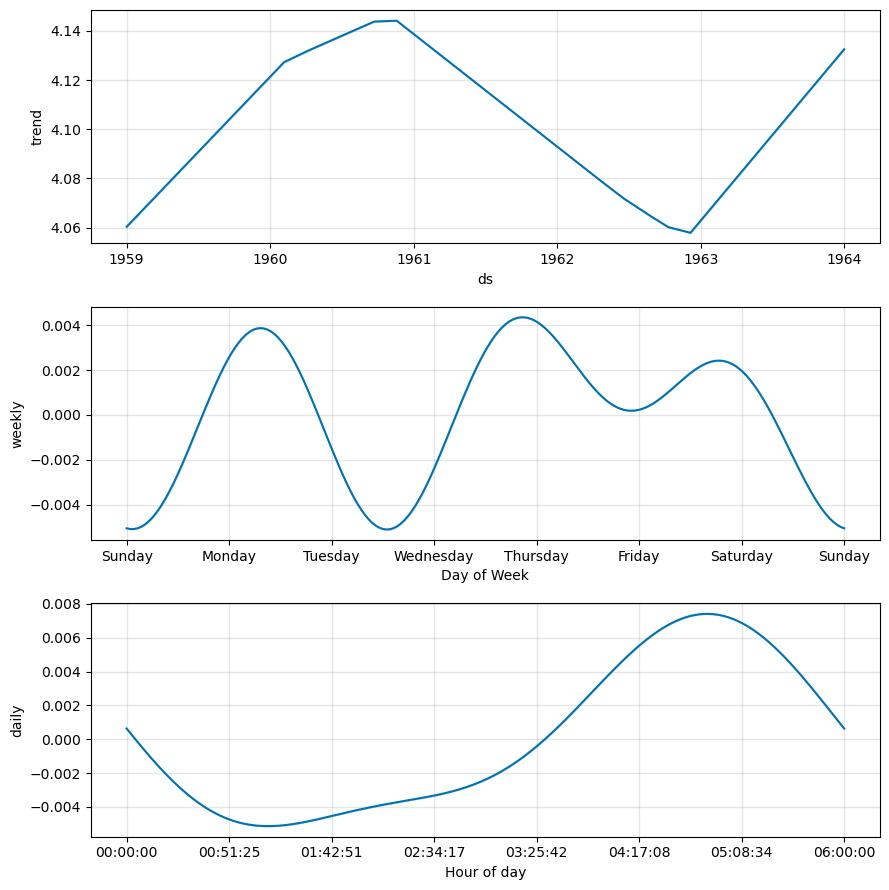

In [174]:
from sklearn import preprocessing
from matplotlib import pyplot as plt


train = data[data.ds <= pd.to_datetime('1963-12-01 00:00:00')]
#train.y = preprocessing.normalize(train.y.to_numpy().reshape(-1, 1), axis = 0)
test = data[data.ds > pd.to_datetime('1963-12-01 00:00:00')]
#test.y = preprocessing.normalize(test.y.to_numpy().reshape(-1, 1), axis = 0)


m = Prophet(yearly_seasonality=False)
m.add_seasonality(name='daily', period=0.25, fourier_order=3)
m.add_seasonality(name='weekly', period = 7, fourier_order=3)
m.fit(train)

future = m.make_future_dataframe(periods=int(31*24), freq = 'H')
forecast = m.predict(future)
#forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

y_true = test.y
x = test.ds
y_pred = forecast[forecast.ds.isin(test.ds)].yhat

print(mean_squared_error(y_true, y_pred), r2_score(y_true, y_pred), mean_absolute_error(y_true, y_pred), median_absolute_error(y_true, y_pred), max_error(y_true, y_pred))

m.plot_components(forecast)#, plt.plot(x, y_pred), plt.plot(x, y_true)

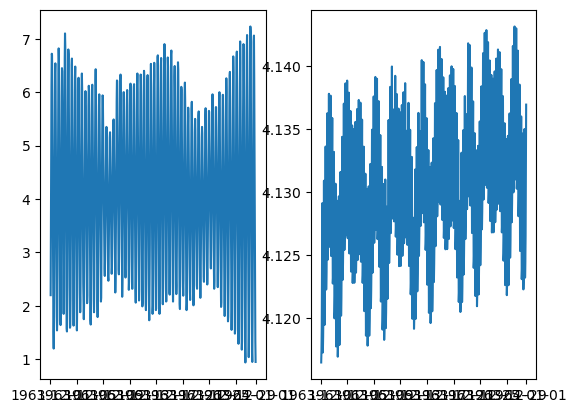

In [175]:
plt.subplot(1,2,1)
plt.plot(x, y_true)

plt.subplot(1,2,2)
plt.plot(x, y_pred)